# Inferring phospho peptides

In the following we will use AlphaQuant's proteoform analysis and combine it with deep learning predictions that give a probability how prone a certain peptide sequence is to phosphorylation. We use the combination of those two to predict phorphorylated proteoforms.

As with the standard differential expression analysis, we need:

* an input file from a proteomics search engine. We support most common search engines. Specifications on input files are given in our [README](https://github.com/MannLabs/alphaquant/blob/master/README.md#preparing-input-files).
* a sample mapping file that maps each sample to a condition (e.g.  sample 'brain_replicate_1' is mapped to condition 'brain').
* (optional) a results directory can be defined on where to save the data
* (optional) a list where we specify, which conditions we compare

Additionally, we need to specify, wether we want to perform 




In [1]:
INPUT_FILE = "./data/phospho/proteome_subset.tsv"
SAMPLEMAP_FILE = "./data/phospho/samplemap_proteome.tsv"
RESULTS_DIRECTORY = "./data/phospho/results_phospho_inference"

CONDPAIRS_LIST = [("egf_treated", "untreated")] #this means each fc is egf_treated/untreated


In [2]:
import alphaquant.run_pipeline as aq_pipeline

aq_pipeline.run_pipeline(input_file=INPUT_FILE, samplemap_file=SAMPLEMAP_FILE, results_dir=RESULTS_DIRECTORY, condpairs_list=CONDPAIRS_LIST, organism_for_phospho_inference="human")

using input type spectronaut_fragion_isotopes
removed pre existing /Users/constantin/workspace/alphaquant/example_nbs/data/phospho/proteome_subset.tsv.ml_info_table.tsv
start processeing condpair ('egf_treated', 'untreated')
normalized within conditions
median 0.3736080582187675, mode 0.49142721072130446
using mode for shift
shift comparison by -0.49142721072130446
normalized between conditions
t_ion2nonan_sw 0.009182214736938477
t_intensity_selection 0.14301586151123047
t_ion2nonan_sw 0.008550882339477539
t_intensity_selection 0.13563084602355957
checked 0 of 4178 ions
checked 2000 of 4178 ions
checked 4000 of 4178 ions
checked 0 of 30 prots

condition pair ('egf_treated', 'untreated') finished!



In [3]:
import pandas as pd

proteoform_df = pd.read_csv(RESULTS_DIRECTORY + "/egf_treated_VS_untreated.proteoforms.tsv", sep='\t')
display(proteoform_df)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
0,O00311,O00311_0,0,True,SEQ_TVDVLSR_;SEQ_ITAEEALLHPFFK_;SEQ_ELDQQSTTK_...,8,7.000000,0.000566,1.00,False,0.000000
1,O43164;O43164-2,O43164;O43164-2_0,0,True,SEQ_SETEIPTCGSALNQTTESSQSFVAVHHSEEGR_;SEQ_YQES...,10,8.000000,-0.540242,0.91,False,0.000000
2,O43164;O43164-2,O43164;O43164-2_1,1,False,SEQ_AGDDYEVLELDDVPK_,1,2.000000,0.265985,0.09,True,0.806226
3,O95159,O95159_0,0,True,SEQ_LATVNWAR_;SEQ_LCNIPLASR_;SEQ_VTNLFCFEHR_;S...,5,6.125000,0.229719,0.83,False,0.000000
4,O95159,O95159_1,1,False,SEQ_DDDRTPGLHGDCDDDK_,1,1.000000,-2.101869,0.17,True,2.331588
5,P00533,P00533_0,0,True,SEQ_FRDEATCK_;SEQ_LFGTSGQK_;SEQ_GMNYLEDR_;SEQ_...,25,15.000000,-0.052698,0.62,False,0.000000
6,P00533,P00533_1,1,False,SEQ_EDSFLQR_;SEQ_DPHYQDPHSTAVGNPEYLNTVQPTCVNST...,9,16.666667,-0.487043,0.23,True,0.434345
7,P00533,P00533_2,2,False,SEQ_ATGQVCHALCSPEGCWGPEPR_;SEQ_EILDEAYVMASVDNP...,3,11.000000,0.589813,0.07,False,0.642511
8,P00533,P00533_3,3,False,SEQ_TPLLSSLSATSNNSTVACIDR_;SEQ_EYHAEGGK_;SEQ_E...,3,6.000000,-1.337923,0.07,True,1.285225
9,P22681,P22681_0,0,True,SEQ_GIFPSGLFQGDTFR_;SEQ_NQNPDLTGLCEPTPQDHIK_;S...,10,7.000000,-0.032274,0.62,False,0.000000


In [4]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0, likely_phospho=True, keep_reference_proteoform=True)
display(proteoform_df_filtered)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
2,O43164;O43164-2,O43164;O43164-2_1,1,False,SEQ_AGDDYEVLELDDVPK_,1,2.000000,0.265985,0.09,True,0.806226
4,O95159,O95159_1,1,False,SEQ_DDDRTPGLHGDCDDDK_,1,1.000000,-2.101869,0.17,True,2.331588
6,P00533,P00533_1,1,False,SEQ_EDSFLQR_;SEQ_DPHYQDPHSTAVGNPEYLNTVQPTCVNST...,9,16.666667,-0.487043,0.23,True,0.434345
8,P00533,P00533_3,3,False,SEQ_TPLLSSLSATSNNSTVACIDR_;SEQ_EYHAEGGK_;SEQ_E...,3,6.000000,-1.337923,0.07,True,1.285225
18,P60953,P60953_2,2,False,SEQ_YVECSALTQK_,1,7.500000,-0.939073,0.12,True,0.731666
1,O43164;O43164-2,O43164;O43164-2_0,0,True,SEQ_SETEIPTCGSALNQTTESSQSFVAVHHSEEGR_;SEQ_YQES...,10,8.000000,-0.540242,0.91,False,0.000000
3,O95159,O95159_0,0,True,SEQ_LATVNWAR_;SEQ_LCNIPLASR_;SEQ_VTNLFCFEHR_;S...,5,6.125000,0.229719,0.83,False,0.000000
5,P00533,P00533_0,0,True,SEQ_FRDEATCK_;SEQ_LFGTSGQK_;SEQ_GMNYLEDR_;SEQ_...,25,15.000000,-0.052698,0.62,False,0.000000
16,P60953,P60953_0,0,True,SEQ_TPFLLVGTQIDLR_;SEQ_NVFDEAILAALEPPEPK_;SEQ_...,4,22.000000,-0.207406,0.50,False,0.000000


O43164;O43164-2


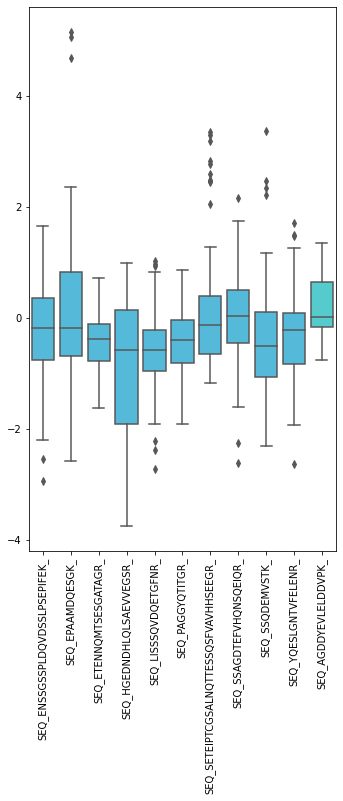

O95159


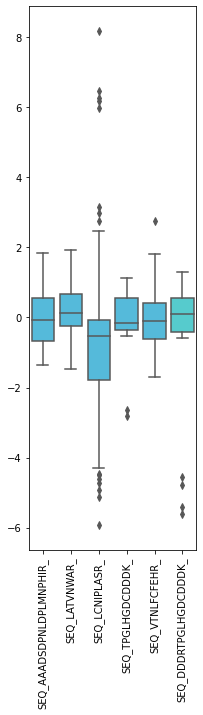

P00533


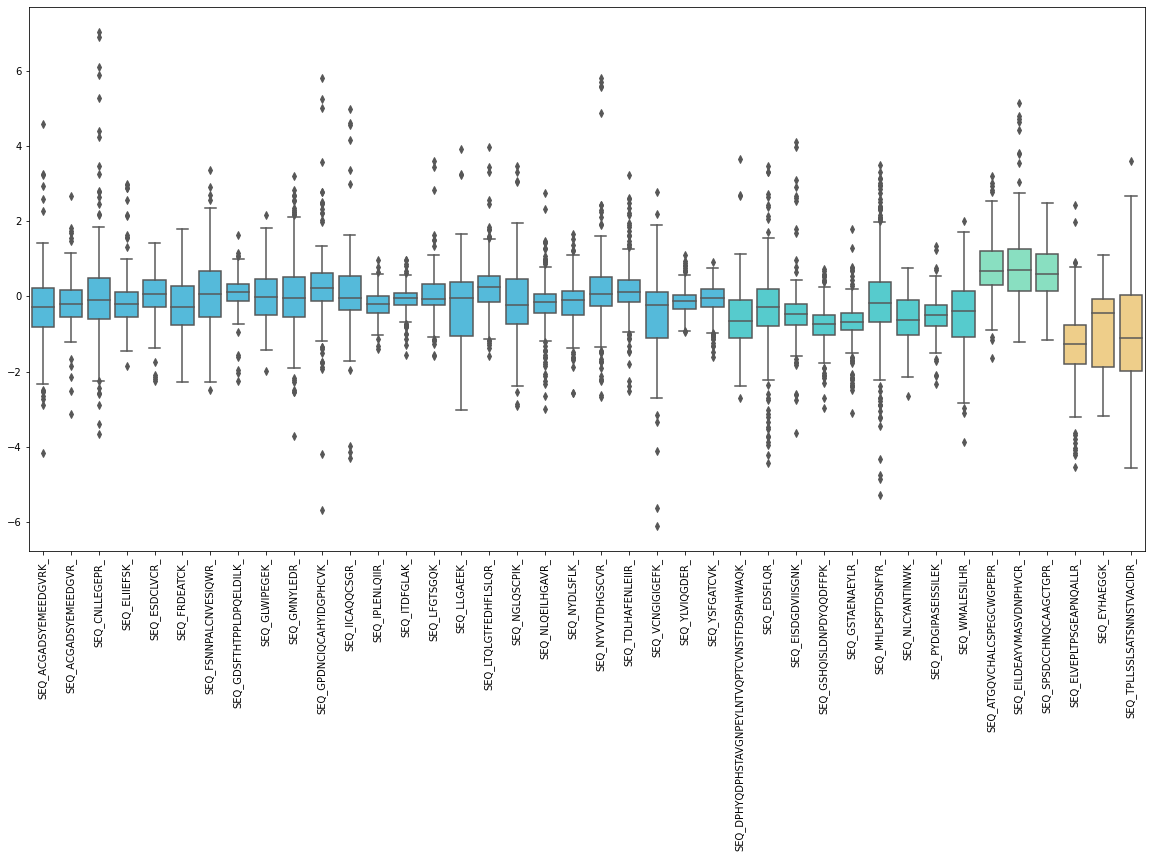

P60953


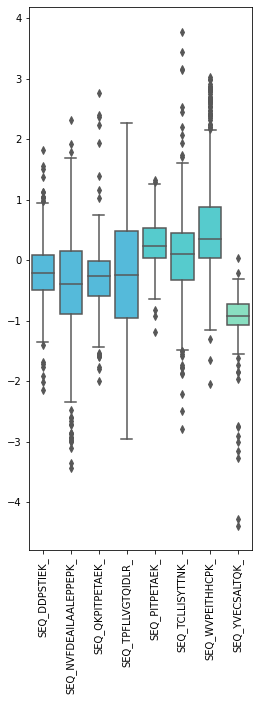

In [5]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils

plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary

quantification_info = aq_fcviz.CondpairQuantificationInfo(("egf_treated", "untreated"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("egf_treated", "untreated", results_folder=RESULTS_DIRECTORY)

protein2node = {x.name : x for x in condpair_tree.children}
for protein_of_interest in proteoform_df_filtered['protein'].unique():
    print(protein_of_interest)
    protein_node = protein2node[protein_of_interest]
    cluster_plotter = aq_fcviz.FCPlotter(protein_node, quantification_info, plotconfig)
